In [68]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [69]:
df = pd.read_csv('../../data/processed/kc_clean_data.csv')

In [142]:
#df.head()
#df['prop_type'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28637 entries, 0 to 28636
Data columns (total 53 columns):
Unnamed: 0               28637 non-null int64
nbr_living_units         28637 non-null int64
building_number          28637 non-null object
stories                  28637 non-null float64
bldg_grade               28637 non-null object
sq_ft1st_floor           28637 non-null int64
sq_ft_half_floor         28637 non-null int64
sq_ft2nd_floor           28637 non-null int64
sq_ft_upper_floor        28637 non-null int64
sq_ft_unfin_full         28637 non-null int64
sq_ft_unfin_half         28637 non-null int64
sq_ft_tot_living         28637 non-null int64
sq_ft_tot_basement       28637 non-null int64
sq_ft_fin_basement       28637 non-null int64
fin_basement_grade       28637 non-null object
sq_ft_garage_basement    28637 non-null int64
sq_ft_garage_attached    28637 non-null int64
daylight_basement        28637 non-null object
sq_ft_open_porch         28637 non-null int64
sq_ft_enclo

In [71]:
df.describe()

,Unnamed: 0,nbr_living_units,stories,sq_ft1st_floor,sq_ft_half_floor,sq_ft2nd_floor,sq_ft_upper_floor,sq_ft_unfin_full,sq_ft_unfin_half,sq_ft_tot_living,...,obsolescence,pcnt_net_condition,addnl_cost,id_number,sq_ft_lot,pcnt_unusable,nbr_bldg_sites,contamination,sale_price,year
count,28637.000000,28637.000000,28637.000000,28637.000000,28637.000000,28637.000000,28637.000000,28637.000000,28637.000000,28637.000000,...,28637.000000,28637.000000,28637.000000,2.863700e+04,2.863700e+04,28637.000000,28637.000000,28637.000000,2.863700e+04,28637.0
mean,14318.000000,1.018577,1.551716,1263.465656,44.785243,563.305758,15.309320,0.731152,0.547823,2178.344380,...,0.124838,0.008695,713.234312,1.132001e+09,1.727772e+04,0.002200,0.009044,0.004819,8.692992e+05,2019.0
std,8266.934166,0.155465,0.540877,508.965612,165.385428,686.186844,96.200182,23.458939,17.191807,985.651812,...,2.423409,0.650057,2586.245351,1.910914e+09,1.493592e+05,0.253545,0.158198,0.470803,1.317266e+06,0.0
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.208000e+03,3.750000e+02,0.000000,0.000000,0.000000,5.000000e+00,2019.0
25%,7159.000000,1.000000,1.000000,940.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1460.000000,...,0.000000,0.000000,0.000000,9.385207e+07,5.000000e+03,0.000000,0.000000,0.000000,4.700000e+05,2019.0
50%,14318.000000,1.000000,1.500000,1200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,...,0.000000,0.000000,0.000000,4.324201e+08,7.440000e+03,0.000000,0.000000,0.000000,6.600000e+05,2019.0
75%,21477.000000,1.000000,2.000000,1500.000000,0.000000,1110.000000,0.000000,0.000000,0.000000,2710.000000,...,0.000000,0.000000,0.000000,9.198014e+08,1.053000e+04,0.000000,0.000000,0.000000,9.226000e+05,2019.0
max,28636.000000,3.000000,4.000000,8760.000000,2210.000000,5110.000000,1805.000000,1350.000000,920.000000,10910.000000,...,99.000000,85.000000,70000.000000,9.835801e+09,2.330525e+07,34.000000,11.000000,46.000000,6.250000e+07,2019.0


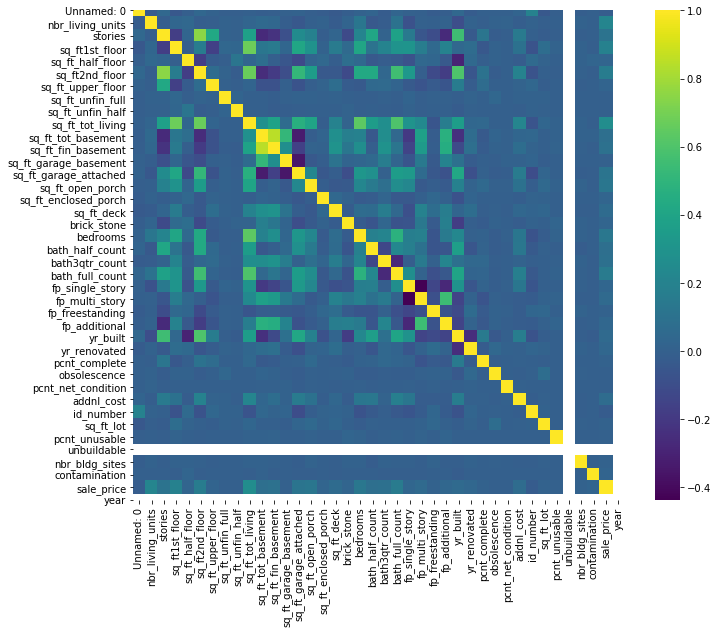

In [72]:
corr = df.corr()
#mask = np.triu[np.ones_like[corr, dtype=np.bool]]

fig1, ax1 = plt.subplots(figsize = (11,9))
sns.heatmap(corr, ax = ax1, cmap = "viridis")

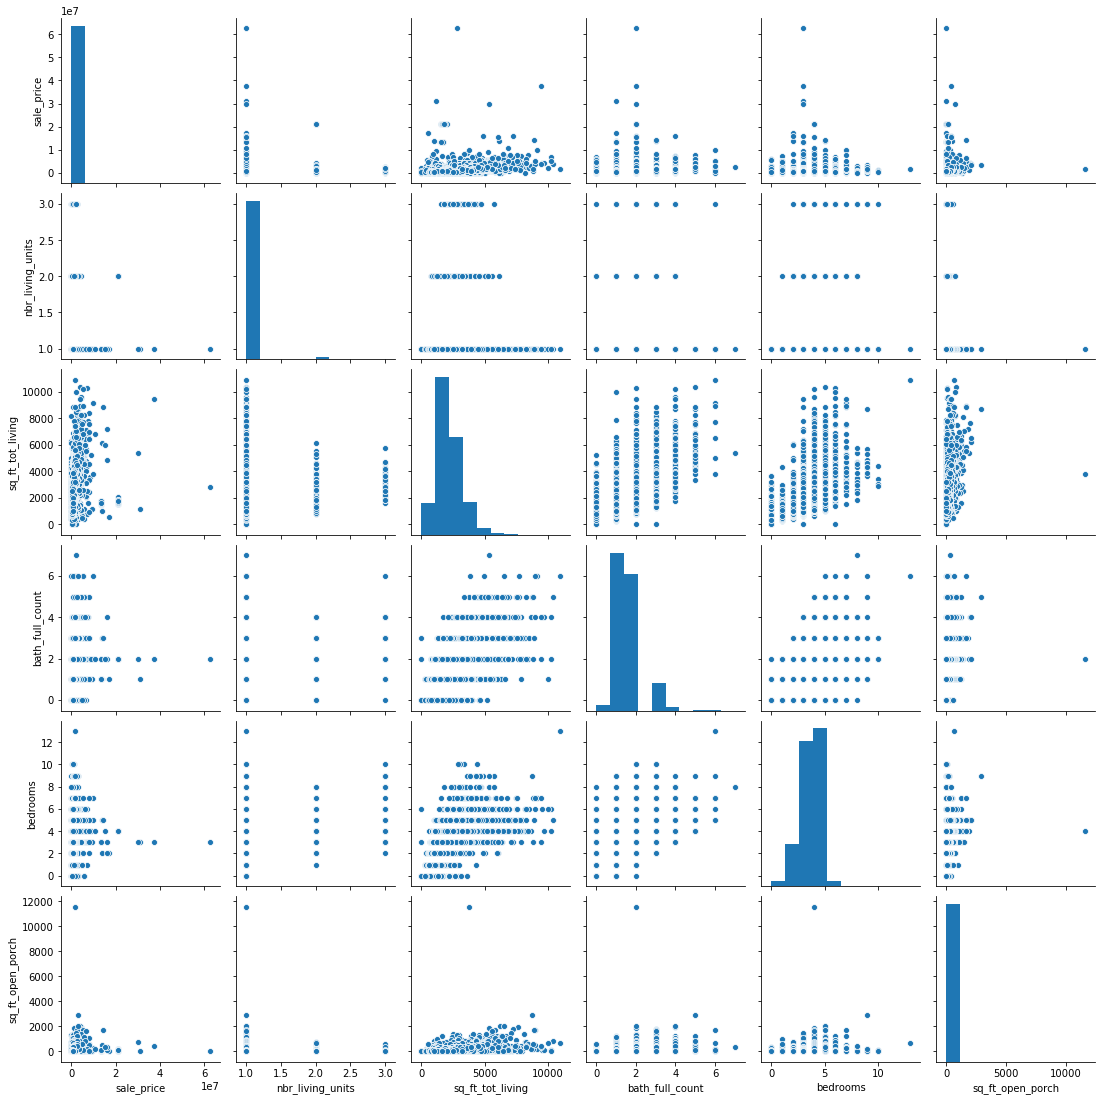

In [73]:
positively_correlated_cols = ['sale_price', 'nbr_living_units', 'sq_ft_tot_living', 'bath_full_count',
                              'bedrooms','sq_ft_open_porch']
positively_correlated_df = df[positively_correlated_cols]
sns.pairplot(positively_correlated_df);

In [74]:
corr_matrix = df.corr()
corr_matrix.sale_price.sort_values(ascending=True)

id_number               -0.026026
Unnamed: 0              -0.016572
pcnt_net_condition      -0.002847
sq_ft_unfin_half        -0.001626
obsolescence            -0.000482
sq_ft_unfin_full         0.000322
sq_ft_garage_basement    0.001356
pcnt_unusable            0.002040
sq_ft_lot                0.006410
pcnt_complete            0.007330
fp_freestanding          0.009060
nbr_bldg_sites           0.010367
sq_ft_upper_floor        0.021832
contamination            0.022773
sq_ft_enclosed_porch     0.025241
sq_ft_half_floor         0.025268
brick_stone              0.025800
fp_single_story          0.032339
yr_renovated             0.036809
fp_additional            0.039284
yr_built                 0.051984
fp_multi_story           0.053827
sq_ft_deck               0.058800
addnl_cost               0.065168
sq_ft_tot_basement       0.080013
bath_half_count          0.084829
bath3qtr_count           0.085890
sq_ft_fin_basement       0.092085
stories                  0.108344
sq_ft_garage_a

In [78]:
#first base model
bm_df = df[['sq_ft_tot_living', 'sale_price']].copy()
bm_df.dropna(inplace = True)

In [79]:
base_model = ols(formula = 'sale_price ~ sq_ft_tot_living', data = bm_df)
base_model_results = base_model.fit()

In [80]:
base_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     2062.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        04:39:50   Log-Likelihood:            -4.4316e+05
No. Observations:               28637   AIC:                         8.863e+05
Df Residuals:                   28635   BIC:                         8.863e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.148e+05   1.82e+04      6.292      0.000     7.9e+04    1.51e+05
sq_ft_tot_living   346.3829      7.628     45.410      0.000     331.432     361.334
==============================================================================
Omnibus:                    56748.786   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        175084045.110
Skew:                          16.058   Prob(JB):                         0.00
Kurtosis:                     384.710   Cond. No.                     5.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

first round of tests on base model

In [81]:
#testing linearity
def rainbow_(model_results):
    rainbow_statistic, rainbow_p_value = linear_rainbow(model_results)
    print("Rainbow Statistic: ", rainbow_statistic)
    print("Rainbow P-Value: ", rainbow_p_value)

In [82]:
rainbow_(base_model_results)

Rainbow Statistic:  0.36911395983441064
Rainbow P-Value:  0.9999999999999999


for testing normality refer to Jarque-Bera

In [90]:
def homoscad_(model_results, model_df, het_b = None):
    y = model_df['sale_price']
    y_hat = model_results.predict()
    fig2, ax2 = plt.subplots()
    ax2.set(xlabel = 'Predicted Sales Prices', ylabel = 'Residuals(Predicted - Actual)')
    ax2.scatter(x = y_hat, y = y_hat - y, color = "red", alpha = 0.1);
    if het_b:
        lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y - y_hat, model_df[het_b])
        print('Lagrange Multiplier P-Value: ', lm_p_value)
        print('F-Statistic P-Value', f_p_value)

Lagrange Multiplier P-Value:  nan
F-Statistic P-Value 3.0542274792624994e-17


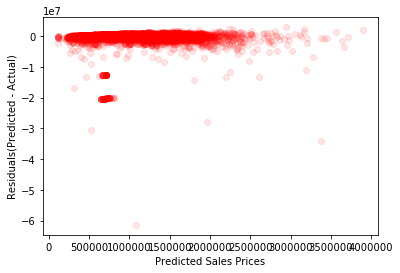

In [91]:
homoscad_(base_model_results, bm_df, ['sq_ft_tot_living'])

First model was very weak and had low R2, lets add more features and see how it does

In [135]:
m2_df = df[['sale_price', 'sq_ft_tot_living', 'nbr_living_units']].copy()
m2_df.dropna(inplace=True)

In [136]:
m2_ = ols(formula = 'sale_price ~ sq_ft_tot_living + nbr_living_units', data = m2_df)
m2_results = m2_.fit()

In [137]:
m2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     1803.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        05:37:54   Log-Likelihood:            -4.4246e+05
No. Observations:               28637   AIC:                         8.849e+05
Df Residuals:                   28634   BIC:                         8.850e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.693e+06   5.08e+04    -33.303      0.000   -1.79e+06   -1.59e+06
sq_ft_tot_living   338.2564      7.446     45.428      0.000     323.662     352.851
nbr_living_units  1.792e+06   4.72e+04     37.962      0.000     1.7e+06    1.88e+06
==============================================================================
Omnibus:                    55087.353   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        169547412.153
Skew:                          14.963   Prob(JB):                         0.00
Kurtosis:                     378.763   Cond. No.                     2.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
rainbow_(m2_results)

Rainbow Statistic:  0.42097607410277216
Rainbow P-Value:  0.9999999999999999


Lagrange Multiplier P-Value:  3.3808136409368095e-50
F-Statistic P-Value 4.1473980497541745e-49


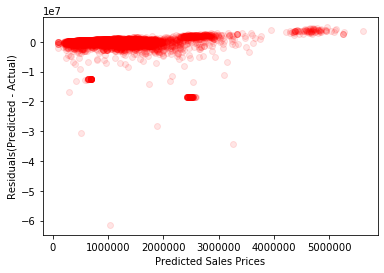

In [132]:
m2_features = ['sq_ft_tot_living', 'nbr_living_units']
homoscad_(m2_results, m2_df, m2_features)

In [133]:
def independance_(model_df, model_features):
    rows = model_df[model_features].values
    vif_df = pd.DataFrame()
    vif_df['VIF'] = [variance_inflation_factor(rows, i) for i in range(len(model_features))]
    return vif_df

In [134]:
independance_(m2_df, m2_features)

,VIF
0,5.387652
1,5.387652


Since the VIF is over 5 after the second iteration, it seems that number of living spaces and sq ft total are correlated, time to check out some other feature

In [138]:
m3_features = ['nbr_living_units', 'sq_ft_open_porch', 'sq_ft_garage_attached']
m3_df = df[['sale_price','nbr_living_units', 'sq_ft_open_porch', 'sq_ft_garage_attached']].copy()

In [139]:
m3 = ols(formula = 'sale_price ~ nbr_living_units + sq_ft_open_porch + sq_ft_garage_attached', data = m3_df)
m3_results = m3.fit()

In [140]:
m3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     770.0
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        05:38:27   Log-Likelihood:            -4.4305e+05
No. Observations:               28637   AIC:                         8.861e+05
Df Residuals:                   28633   BIC:                         8.861e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.264e+06   5.05e+04    -25.003      0.000   -1.36e+06   -1.16e+06
nbr_living_units       1.897e+06   4.82e+04     39.334      0.000     1.8e+06    1.99e+06
sq_ft_open_porch        971.9963     52.997     18.341      0.000     868.119    1075.873
sq_ft_garage_attached   466.7174     26.720     17.467      0.000     414.345     519.090
==============================================================================
Omnibus:                    53365.693   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        145569726.613
Skew:                          13.947   Prob(JB):                         0.00
Kurtosis:                     351.167   Cond. No.                     3.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
independance_(m3_df, m3_features)

,VIF
0,1.902493
1,1.364929
2,1.895971


In [145]:
m4_features = ['nbr_living_units', 'sq_ft_open_porch', 'sq_ft_garage_attached', 'heat_system' ]
m4_df = df[['sale_price','nbr_living_units', 'sq_ft_open_porch','sq_ft_garage_attached','heat_system']].copy()

In [148]:
df.heat_system.unique()

array(['Forced Air', 'Floor-Wall', 'Hot Water', 'Elec BB', 'Heat Pump',
       '0', 'Gravity', 'Radiant', 'Other'], dtype=object)

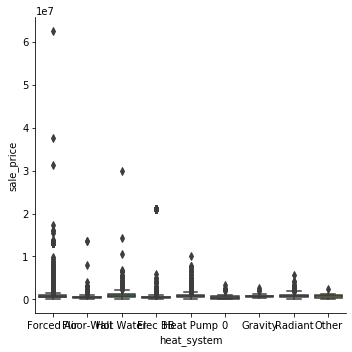

In [151]:
sns.catplot(x = 'heat_system', y = 'sale_price', data = m4_df, kind = 'box')
plt.savefig('forced_air.png')

In [150]:
label_encoder = LabelEncoder()


In [146]:
m4 = ols(formula = 'sale_price ~ nbr_living_units + sq_ft_open_porch + sq_ft_garage_attached', data = m4_df)
m4_results = m4.fit()

In [147]:
m4_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     770.0
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        05:41:19   Log-Likelihood:            -4.4305e+05
No. Observations:               28637   AIC:                         8.861e+05
Df Residuals:                   28633   BIC:                         8.861e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.264e+06   5.05e+04    -25.003      0.000   -1.36e+06   -1.16e+06
nbr_living_units       1.897e+06   4.82e+04     39.334      0.000     1.8e+06    1.99e+06
sq_ft_open_porch        971.9963     52.997     18.341      0.000     868.119    1075.873
sq_ft_garage_attached   466.7174     26.720     17.467      0.000     414.345     519.090
==============================================================================
Omnibus:                    53365.693   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        145569726.613
Skew:                          13.947   Prob(JB):                         0.00
Kurtosis:                     351.167   Cond. No.                     3.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""